#### Discrete Simulation HW3
#### Problem 1
Authored: Austin Jetrin Maddison 6481268

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from my_settings import *

In [2]:
def chain_dist(chains=4, L=0, U=371):
    if chains == 0:
        return np.random.randint(L, U) 
    
    U_new = chain_dist(chains-1, L, U)
    if U_new == L : return U_new
    
    return np.random.randint(L, U_new)

In [3]:
f = np.vectorize(lambda x : chain_dist())
leading_digit =  np.vectorize(lambda _: int(str(np.abs(_))[0]))

In [4]:
N = 1000000
res = leading_digit( f( np.zeros(N) ) )

In [5]:
res

array([0, 0, 9, ..., 0, 2, 0])

In [6]:
hist, edge = np.histogram(res, density=True, bins=np.arange(0, 11, 1))

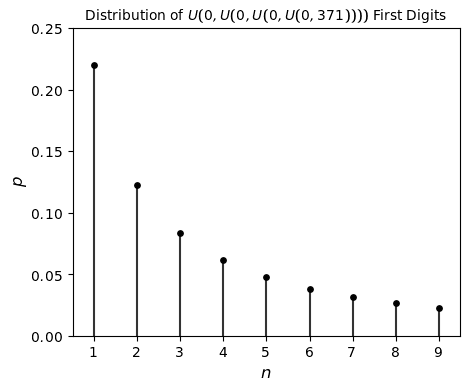

In [7]:
plt.figure(figsize=(5, 4))
plt.scatter(edge[1:-1], hist[1:], s=15, color="k", marker='o', zorder=4)
plt.vlines(edge[1:-1], ymax=hist[1:], ymin=np.zeros(hist.size-1), color='k', alpha=0.8)

plt.xticks(np.arange(1, 10, 1, dtype=int))
plt.yticks(np.arange(0, 1.1, 0.05, dtype=float))
plt.xlim(0.5, 9.5)
plt.ylim(0, 0.25)
plt.title("Distribution of $U(0,U(0,U(0,U(0,371))))$ First Digits", fontsize=10)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("../drawings/p1.pdf")